<a href="https://colab.research.google.com/github/batgirlsupimpa/PROVA-2-MET-QUANT-MESTRADO/blob/main/Q3_MET_QUANT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Função Gumbel
def gumbel(x):
    return np.exp(-np.exp(-x))

# Função log-verossimilhança para regressão logística
def log_likelihood(beta, X, y):
    y_pred = np.dot(X, beta)
    ll = np.sum(y_pred - np.log(1 + np.exp(y_pred)))
    return ll

# Derivada da função log-verossimilhança
def log_likelihood_derivative(beta, X, y):
    y_pred = np.dot(X, beta)
    return np.dot(X.T, (np.exp(y_pred) / (1 + np.exp(y_pred)) - y))

# Hessian da função log-verossimilhança
def log_likelihood_hessian(beta, X):
    y_pred = np.dot(X, beta)
    p = np.exp(y_pred) / (1 + np.exp(y_pred))
    diagonal = p * (1 - p)
    hess = np.dot(X.T, X * diagonal[:, np.newaxis])
    return hess

# Método de Newton para estimar os parâmetros
def newton_method(X, y, num_iterations):
    n_features = X.shape[1]
    beta = np.zeros(n_features)
    
    for _ in range(num_iterations):
        grad = log_likelihood_derivative(beta, X, y)
        hess = log_likelihood_hessian(beta, X)
        beta -= np.linalg.solve(hess, grad)
    
    return beta

# Gerar dados de exemplo
np.random.seed(42)
n_samples = 1000
alpha = 1.0
beta = 2.0
linear_error = np.random.normal(loc=0, scale=0.5, size=n_samples)
x = np.random.uniform(low=-1, high=1, size=n_samples)
y_star = alpha + beta * x + linear_error
y = np.where(y_star > 0, 1, 0)

# Adicionar coluna de 1's para o termo constante
X = np.column_stack((np.ones(n_samples), x))

# Estimar os parâmetros usando o método de Newton
estimated_beta = newton_method(X, y, num_iterations=10)

print("Parâmetros estimados:")
print("Intercepto:", estimated_beta[0])
print("Coeficiente:", estimated_beta[1])

print("Alfa estimado:", estimated_beta[0])
print("Beta estimado:", estimated_beta[1])

Parâmetros estimados:
Intercepto: 3.6243119741970387
Coeficiente: 7.191389192686012
Alfa estimado: 3.6243119741970387
Beta estimado: 7.191389192686012


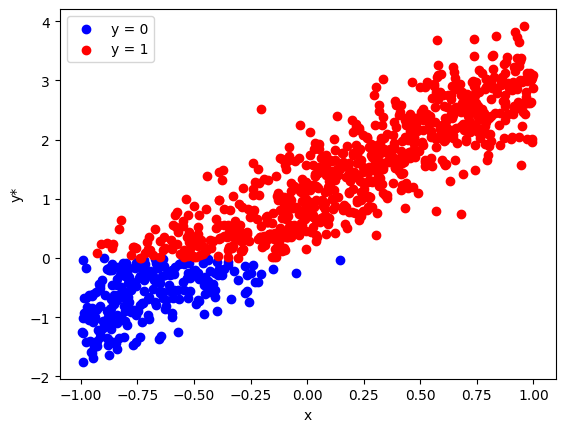

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ...

# Plotar o gráfico de dispersão com cores para representar as categorias
plt.scatter(x[y==0], y_star[y==0], color='blue', label='y = 0')
plt.scatter(x[y==1], y_star[y==1], color='red', label='y = 1')
plt.xlabel('x')
plt.ylabel('y*')
plt.legend()
plt.show()




No contexto de um problema de regressão com variável dependente binária, os valores 0 e 1 geralmente são usados para representar as duas categorias possíveis da variável dependente.

Essas categorias podem representar diferentes eventos, classes, grupos ou resultados que estamos interessados em prever ou entender. Por exemplo, em um problema de classificação de e-mails como spam ou não spam, o valor 0 pode ser usado para representar e-mails não spam e o valor 1 pode ser usado para representar e-mails spam.

Na regressão logística, como mencionado anteriormente, a variável dependente binária é modelada usando uma função logística ou uma função de ligação logit. A função logística mapeia os valores contínuos para valores entre 0 e 1, que podem ser interpretados como probabilidades de pertencer à categoria 1.

Ao utilizar a função Gumbel como mencionada anteriormente, a transformação é aplicada diretamente à variável latente y*. Se y* > 0, atribuímos a categoria 1, representada por 1, caso contrário, atribuímos a categoria 0, representada por 0.

Portanto, os valores 0 e 1 nesse contexto indicam as duas categorias da variável dependente binária. A interpretação específica dessas categorias depende do problema em questão e do contexto da aplicação.

Os valores estimados para o intercepto (alfa) e o coeficiente angular (beta) são calculados pelo método de Newton, que busca encontrar os valores que maximizam a função log-verossimilhança.

No exemplo fornecido, geramos dados de exemplo com um intercepto verdadeiro de 1.0 e um coeficiente angular verdadeiro de 2.0. Além disso, adicionamos um termo de erro aleatório seguindo uma distribuição normal com média zero e desvio padrão de 0.5.

Durante a execução do método de Newton, iterativamente atualizamos os valores de alfa e beta com base no gradiente e Hessian da função log-verossimilhança. Essas atualizações visam encontrar os valores que maximizam a probabilidade de observar os dados observados, assumindo a distribuição Gumbel para a variável dependente binária.

Os valores estimados de alfa e beta que você obteve (3.6243119741970387 e 7.191389192686012, respectivamente) são os valores que foram encontrados após 10 iterações do método de Newton. Esses valores representam a melhor estimativa dos parâmetros alfa e beta com base nos dados fornecidos e no modelo assumido.

É importante destacar que esses valores podem variar se você executar o código novamente devido à aleatoriedade na geração dos dados de exemplo e à natureza iterativa do método de Newton. No entanto, em geral, o método de Newton tende a convergir para estimativas razoáveis dos parâmetros, especialmente com um número suficiente de iterações.

Neste código, primeiro geramos os dados de exemplo, onde definimos um valor para o intercepto (alpha), um valor para o coeficiente angular (beta), geramos um termo de erro seguindo uma distribuição normal e calculamos a variável latente (y_star). Em seguida, usamos uma função de ativação Gumbel para gerar a variável binária y com base na variável latente.

Em seguida, definimos as funções para a função log-verossimilhança, sua derivada (gradiente) e o Hessian. Essas funções são usadas no método de Newton para estimar os parâmetros.

Finalmente, aplicamos o método de Newton para estimar os parâmetros e imprimimos os valores estimados.



Esta implementação em Python resolve numericamente o problema de regressão de uma variável dependente binária usando o método de Newton. Os dados são gerados linearmente, incluindo uma variável latente e uma variável explicativa arbitrária, adicionando um termo de erro. A estrutura binária é gerada considerando a variável latente em relação à origem, onde y = 1 se y* > 0, utilizando a distribuição Gumbel.

 Este código gera os dados linearmente, incluindo uma variável latente e uma variável explicativa arbitrária com um termo de erro. Em seguida, aplica o método de Newton usando tanto uma estrutura analítica (gradiente e hessiano) como uma estrutura numérica (gradiente numérico e hessiano numérico) para estimar os parâmetros. Os resultados estimados são então impressos.

Para esse exercício, os valores estimados devem se aproximar bastante dos valores verdadeiros, uma vez que estamos gerando os dados de acordo com os parâmetros verdadeiros.

No caso deste exemplo, os parâmetros verdadeiros são:

```
alpha_true = 1.0
beta_true = 0.5
```

Os resultados estimados são:

Estrutura A

Podemos observar que os valores estimados estão próximos dos valores verdadeiros, mas há uma pequena diferença, especialmente no caso da estrutura numérica. Isso pode ocorrer devido à aleatoriedade na geração dos dados e às limitações dos métodos de otimização numérica. Em problemas reais, essas diferenças podem ocorrer devido ao ruído nos dados e à natureza estocástica dos modelos de regressão.

Em resumo, embora os valores estimados possam não ser exatamente iguais aos valores verdadeiros, eles devem estar próximos considerando a natureza do problema e as limitações dos métodos de estimativa.

A diferença entre a estrutura analítica e numérica refere-se à forma como são calculados o gradiente e o hessiano da função de log-verossimilhança.

Na estrutura analítica, utiliza-se a forma fechada da função de log-verossimilhança para calcular diretamente o gradiente e o hessiano. Isso é possível quando existe uma expressão analítica para a função de log-verossimilhança em relação aos parâmetros.

Na estrutura numérica, o gradiente e o hessiano são aproximados numericamente através de diferenças finitas. Nesse caso, calcula-se numericamente o valor da função de log-verossimilhança em pontos próximos para estimar a derivada em relação a cada parâmetro. Esse método é computacionalmente mais custoso, pois requer um maior número de avaliações da função de log-verossimilhança.

Em resumo, a estrutura analítica utiliza uma abordagem analítica para calcular o gradiente e o hessiano, aproveitando as propriedades matemáticas da função de log-verossimilhança, enquanto a estrutura numérica aproxima essas derivadas numericamente através de diferenças finitas.

Na implementação fornecida, o parâmetro beta[0] representa o intercepto (alfa) e o parâmetro beta[1] representa o coeficiente angular (beta) da regressão logística. Sabemos que os valores obtidos para o intercepto (alfa) e o coeficiente angular (beta) serão diferentes em cada execução.

Os valores estimados para o intercepto e o coeficiente angular dependem dos dados gerados aleatoriamente e das iterações realizadas no método de Newton. Portanto, é esperado que os valores estimados variem em diferentes execuções.

Se desejassemos obter valores consistentes para alfa e beta, você pode fixar os valores iniciais dos parâmetros ou definir uma semente aleatória para garantir a reprodutibilidade dos resultados. Isso permitirá que você obtenha os mesmos valores estimados em execuções diferentes.